In [87]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [288]:
# mobility data
data_tr = pd.read_excel('mobility_tr.xlsx')
data_jp = pd.read_excel('mobility_jp.xlsx')
data_us = pd.read_excel('mobility_us.xlsx')
data_kr = pd.read_excel('mobility_kr.xlsx')
data_dk = pd.read_excel('mobility_dk.xlsx')
data_no = pd.read_excel('mobility_no.xlsx')

# incidence and variant data ['cases', alpha etc]
tr_var = pd.read_excel('tr_var.xlsx')
us_var = pd.read_excel('us_var.xlsx')
jp_var = pd.read_excel('jp_var.xlsx')
kr_var = pd.read_excel('kr_var.xlsx')

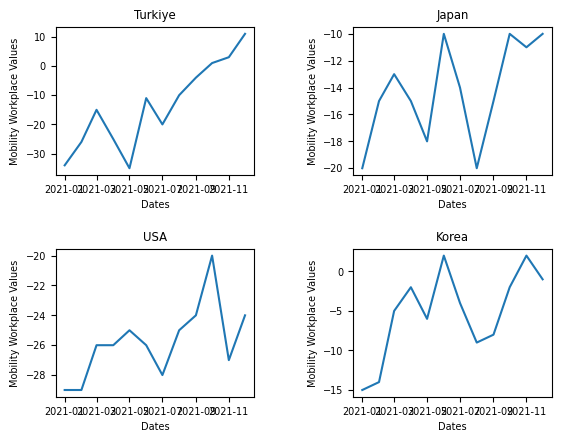

In [289]:
# mobility data graphics
x_axis_tr = data_tr["date"]
y_axis_tr = data_tr["workplaces_percent_change_from_baseline"]

x_axis_jp = data_jp["date"]
y_axis_jp = data_jp["workplaces_percent_change_from_baseline"]

x_axis_us = data_us["date"]
y_axis_us = data_us["workplaces_percent_change_from_baseline"]

x_axis_kr = data_kr["date"]
y_axis_kr = data_kr["workplaces_percent_change_from_baseline"]

plt.subplot(2, 2, 1)
plt.plot(x_axis_tr, y_axis_tr)
plt.title("Turkiye")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplot(2, 2, 2)
plt.plot(x_axis_jp, y_axis_jp)
plt.title("Japan")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplot(2, 2, 3)
plt.plot(x_axis_us, y_axis_us)
plt.title("USA")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplot(2, 2, 4)
plt.plot(x_axis_kr, y_axis_kr)
plt.title("Korea")
plt.xlabel('Dates')
plt.ylabel('Mobility Workplace Values')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 

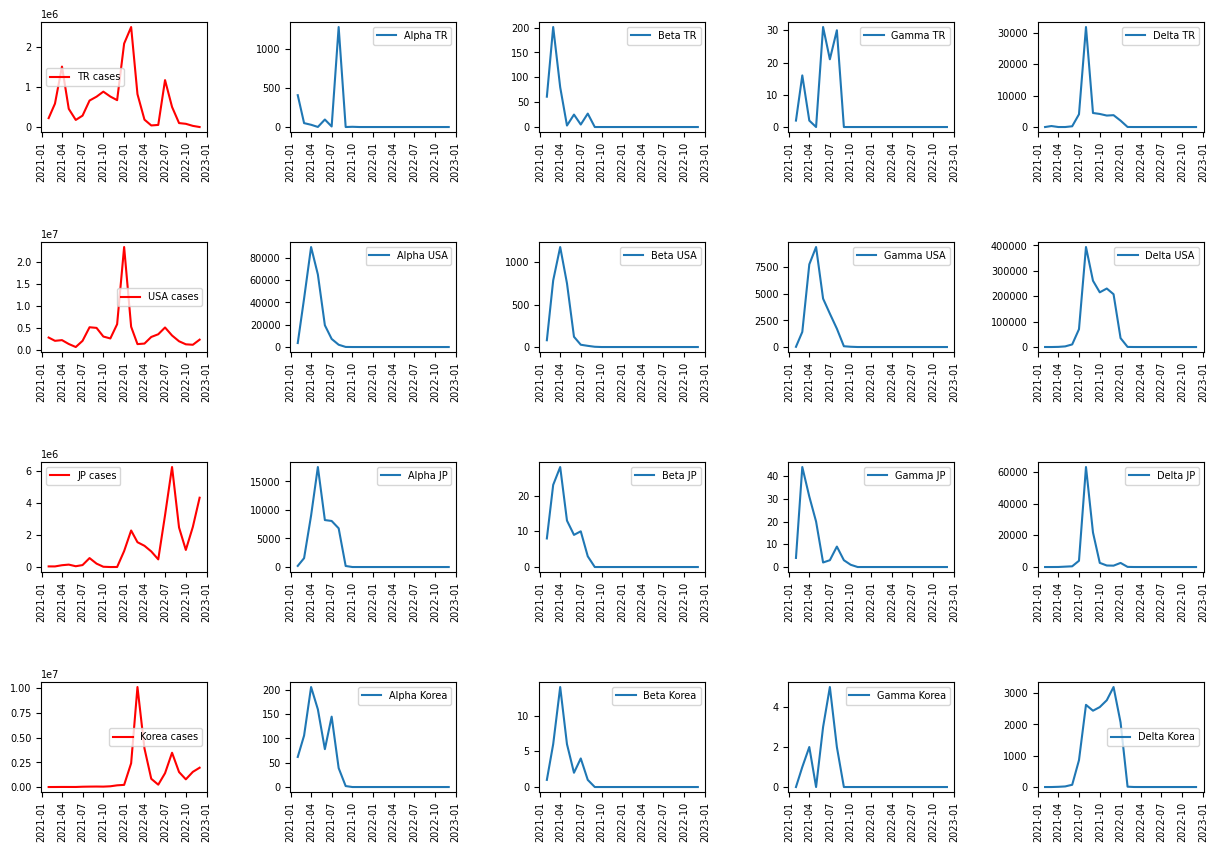

In [290]:
# Incidence data graphics
tr_x = tr_var['Month']
tr_y = tr_var['cases']

us_x = us_var['Month']
us_y = us_var['cases']

jp_x = jp_var['Month']
jp_y = jp_var['cases']

kr_x = kr_var['Month']
kr_y = kr_var['cases']

x_var_tr = tr_var['Month']
y_var_tr_alpha = tr_var['Alpha']
y_var_tr_beta = tr_var['Beta']
y_var_tr_gamma = tr_var['Gamma']
y_var_tr_delta = tr_var['Delta']

x_var_us = us_var['Month']
y_var_us_alpha = us_var['Alpha']
y_var_us_beta = us_var['Beta']
y_var_us_gamma = us_var['Gamma']
y_var_us_delta = us_var['Delta']

x_var_jp = jp_var['Month']
y_var_jp_alpha = jp_var['Alpha']
y_var_jp_beta = jp_var['Beta']
y_var_jp_gamma = jp_var['Gamma']
y_var_jp_delta = jp_var['Delta']

x_var_kr = kr_var['Month']
y_var_kr_alpha = kr_var['Alpha']
y_var_kr_beta = kr_var['Beta']
y_var_kr_gamma = kr_var['Gamma']
y_var_kr_delta = kr_var['Delta']

plt.rcParams.update({'font.size': 7})

plt.figure(figsize=(15, 10))

plt.subplot(4,5,1)
plt.plot(tr_x, tr_y, color='r', label='TR cases') 
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,2)
plt.plot(x_var_tr, y_var_tr_alpha, label='Alpha TR')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,3)
plt.plot(x_var_tr, y_var_tr_beta, label='Beta TR')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,4)
plt.plot(x_var_tr, y_var_tr_gamma, label='Gamma TR')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,5)
plt.plot(x_var_tr, y_var_tr_delta, label='Delta TR')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(4,5,6)
plt.plot(us_x, us_y, color='r', label='USA cases') 
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,7)
plt.plot(x_var_us, y_var_us_alpha, label='Alpha USA')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,8)
plt.plot(x_var_us, y_var_us_beta, label='Beta USA')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,9)
plt.plot(x_var_us, y_var_us_gamma, label='Gamma USA')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,10)
plt.plot(x_var_us, y_var_us_delta, label='Delta USA')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(4,5,11)
plt.plot(jp_x, jp_y, color='r', label='JP cases') 
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,12)
plt.plot(x_var_jp, y_var_jp_alpha, label='Alpha JP')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,13)
plt.plot(x_var_jp, y_var_jp_beta, label='Beta JP')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,14)
plt.plot(x_var_jp, y_var_jp_gamma, label='Gamma JP')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,15)
plt.plot(x_var_jp, y_var_jp_delta, label='Delta JP')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(4,5,16)
plt.plot(kr_x, kr_y, color='r', label='Korea cases') 
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,17)
plt.plot(x_var_kr, y_var_kr_alpha, label='Alpha Korea')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,18)
plt.plot(x_var_kr, y_var_kr_beta, label='Beta Korea')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,19)
plt.plot(x_var_kr, y_var_kr_gamma, label='Gamma Korea')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(4,5,20)
plt.plot(x_var_kr, y_var_kr_delta, label='Delta Korea')
plt.xticks(rotation=90)
plt.legend()

plt.subplots_adjust(hspace=1, wspace=0.5) 

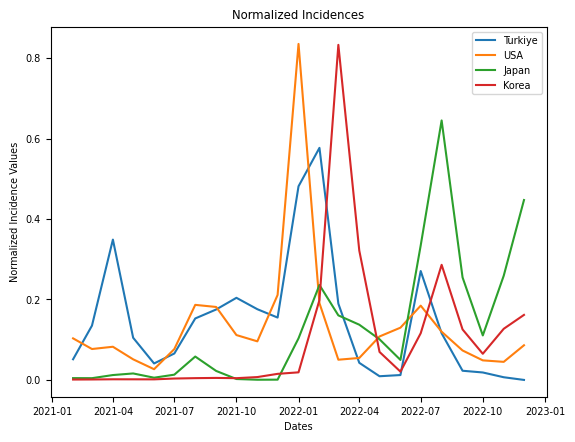

In [291]:
# Normalized Incidence 
normalized_arr_tr = preprocessing.normalize([tr_y])
tr_nor = np.transpose(normalized_arr_tr)

normalized_arr_us = preprocessing.normalize([us_y])
us_nor= np.transpose(normalized_arr_us)

normalized_arr_jp = preprocessing.normalize([jp_y])
jp_nor = np.transpose(normalized_arr_jp)

normalized_arr_kr = preprocessing.normalize([kr_y])
kr_nor = np.transpose(normalized_arr_kr)

plt.plot(tr_x, tr_nor, label='Turkiye')
plt.plot(us_x, us_nor, label='USA')
plt.plot(jp_x, jp_nor, label='Japan')
plt.plot(kr_x, kr_nor, label='Korea')
plt.title('Normalized Incidences')
plt.xlabel('Dates')
plt.ylabel('Normalized Incidence Values')
plt.legend()
plt.show()

In [292]:
# variant for Turkiye
x_var_tr = tr_var['Month']
y_var_tr_alpha = tr_var['Alpha']
y_var_tr_beta = tr_var['Beta']
y_var_tr_gamma = tr_var['Gamma']
y_var_tr_delta = tr_var['Delta']

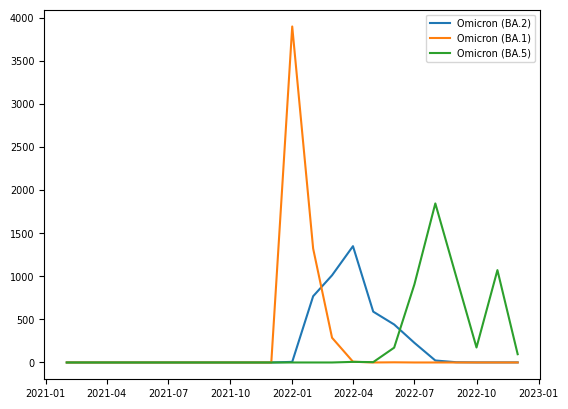

In [293]:
# variant omicron plot for Turkiye (2022)
y_var_tr_o2 = tr_var['Omicron (BA.2)']
y_var_tr_o1 = tr_var['Omicron (BA.1)']
y_var_tr_o5 = tr_var['Omicron (BA.5)']

plt.plot(x_var_tr, y_var_tr_o2, label= "Omicron (BA.2)")
plt.plot(x_var_tr, y_var_tr_o1, label= "Omicron (BA.1)")
plt.plot(x_var_tr, y_var_tr_o5, label= "Omicron (BA.5)")
plt.legend()

In [294]:
# variant for USA
x_var_us = us_var['Month']
y_var_us_alpha = us_var['Alpha']
y_var_us_beta = us_var['Beta']
y_var_us_gamma = us_var['Gamma']
y_var_us_delta = us_var['Delta']

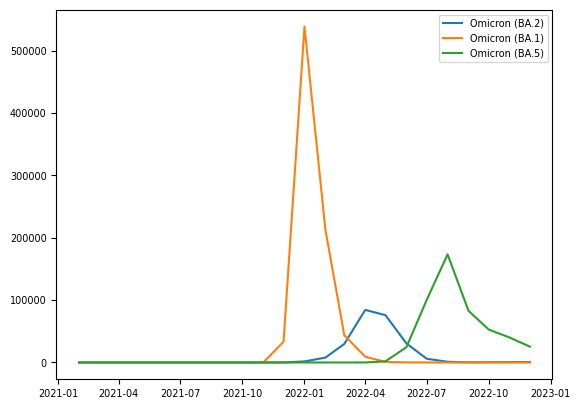

In [295]:
# variant omicron plot for USA (2022)
y_var_us_o2 = us_var['Omicron (BA.2)']
y_var_us_o1 = us_var['Omicron (BA.1)']
y_var_us_o5 = us_var['Omicron (BA.5)']

plt.plot(x_var_us, y_var_us_o2, label= "Omicron (BA.2)")
plt.plot(x_var_us, y_var_us_o1, label= "Omicron (BA.1)")
plt.plot(x_var_us, y_var_us_o5, label= "Omicron (BA.5)")
plt.legend()

Text(0.5, 1.0, 'Mobility Changes')

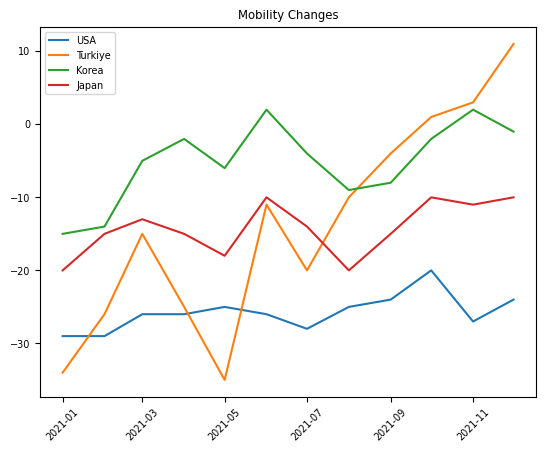

In [296]:
# sosyo-ekonomik sonuç yorum
x_axis_tr = data_tr["date"][0:12] 
y_axis_tr = data_tr["workplaces_percent_change_from_baseline"][0:12]  
x_axis_us = data_us["date"][0:12] 
y_axis_us = data_us["workplaces_percent_change_from_baseline"][0:12]  
x_axis_kr = data_kr["date"][0:12] 
y_axis_kr = data_kr["workplaces_percent_change_from_baseline"][0:12] 
x_axis_jp = data_jp["date"][0:12] 
y_axis_jp = data_jp["workplaces_percent_change_from_baseline"][0:12] 

plt.plot(x_axis_us, y_axis_us, label='USA')
plt.xticks(rotation=45)
plt.legend() 
plt.plot(x_axis_tr, y_axis_tr, label='Turkiye')
plt.xticks(rotation=45)
plt.legend() 
plt.plot(x_axis_kr, y_axis_kr, label='Korea')
plt.xticks(rotation=45)
plt.legend()
plt.plot(x_axis_jp, y_axis_jp, label='Japan')
plt.xticks(rotation=45)
plt.legend() 
plt.title("Mobility Changes")

In [297]:
# Calculate the distance
#### take the whole country, fit the curve then calculate the distance between two curves

dist_abs_tr_us = []
dist_tr_us = y_axis_tr - y_axis_us
a = np.abs(dist_tr_us)
dist_abs_tr_us.append(a)
    
np.transpose(dist_abs_tr_us)
print(dist_abs_tr_us)

dist_abs_tr_kr = []
dist_tr_kr = y_axis_tr - y_axis_kr
b = np.abs(dist_tr_kr)
dist_abs_tr_kr.append(b)
    
np.transpose(dist_abs_tr_kr)
print(dist_abs_tr_kr)

[0      5
1      3
2     11
3      1
4     10
5     15
6      8
7     15
8     20
9     21
10    30
11    35
Name: workplaces_percent_change_from_baseline, dtype: int64]
[0     19
1     12
2     10
3     23
4     29
5     13
6     16
7      1
8      4
9      3
10     1
11    12
Name: workplaces_percent_change_from_baseline, dtype: int64]


Text(0.5, 1.0, 'Correlation Matrix Turkiye')

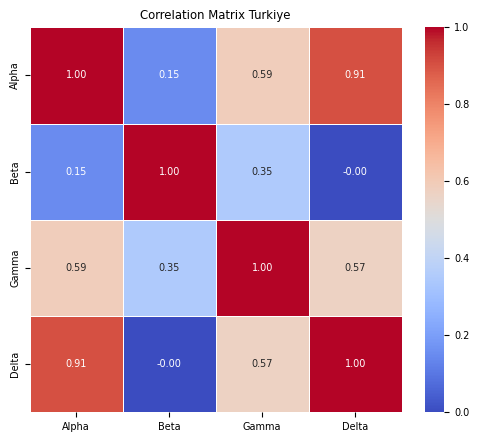

In [298]:
potential_common_key = 'Month'

# Select the columns you want to use for correlation from each DataFrame
selected_columns_df1 = tr_var[['Alpha', 'Beta', potential_common_key]]
selected_columns_df2 = tr_var[['Gamma', 'Delta', potential_common_key]]

# Merge the selected columns into a single DataFrame based on the potential common key
merged_data = pd.merge(selected_columns_df1, selected_columns_df2, on=potential_common_key)

# Drop the potential_common_key column if you don't want it in the correlation analysis
merged_data = merged_data.drop(columns=[potential_common_key])

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Turkiye')

Text(0.5, 1.0, 'Correlation Matrix USA')

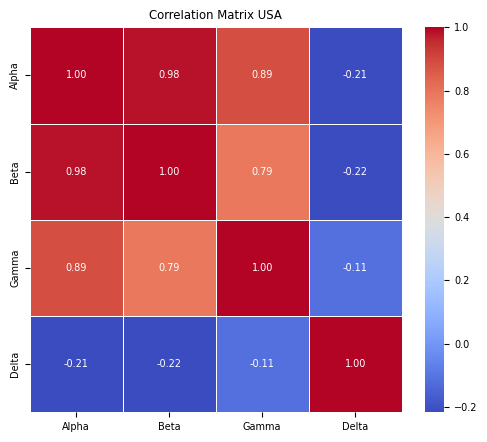

In [299]:
potential_common_key = 'Month'

# Select the columns you want to use for correlation from each DataFrame
selected_columns_df1 = us_var[['Alpha', 'Beta', potential_common_key]]
selected_columns_df2 = us_var[['Gamma', 'Delta', potential_common_key]]

# Merge the selected columns into a single DataFrame based on the potential common key
merged_data = pd.merge(selected_columns_df1, selected_columns_df2, on=potential_common_key)

# Drop the potential_common_key column if you don't want it in the correlation analysis
merged_data = merged_data.drop(columns=[potential_common_key])

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix USA')

Text(0.5, 1.0, 'Correlation Matrix Japan')

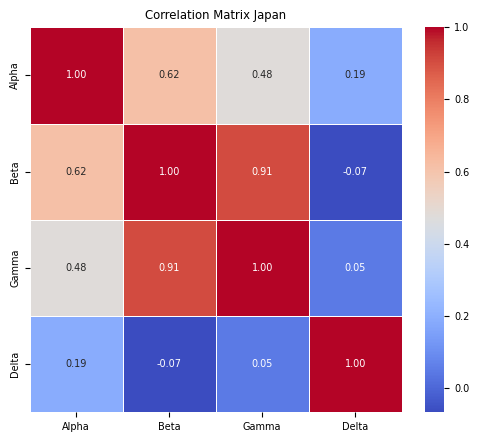

In [300]:
potential_common_key = 'Month'

# Select the columns you want to use for correlation from each DataFrame
selected_columns_df1 = jp_var[['Alpha', 'Beta', potential_common_key]]
selected_columns_df2 = jp_var[['Gamma', 'Delta', potential_common_key]]

# Merge the selected columns into a single DataFrame based on the potential common key
merged_data = pd.merge(selected_columns_df1, selected_columns_df2, on=potential_common_key)

# Drop the potential_common_key column if you don't want it in the correlation analysis
merged_data = merged_data.drop(columns=[potential_common_key])

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Japan')

Text(0.5, 1.0, 'Correlation Matrix Korea')

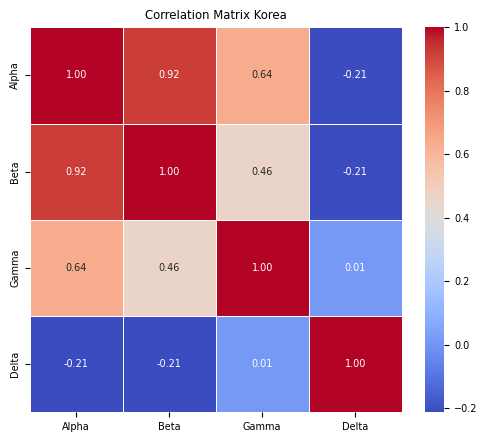

In [301]:
potential_common_key = 'Month'

# Select the columns you want to use for correlation from each DataFrame
selected_columns_df1 = kr_var[['Alpha', 'Beta', potential_common_key]]
selected_columns_df2 = kr_var[['Gamma', 'Delta', potential_common_key]]

# Merge the selected columns into a single DataFrame based on the potential common key
merged_data = pd.merge(selected_columns_df1, selected_columns_df2, on=potential_common_key)

# Drop the potential_common_key column if you don't want it in the correlation analysis
merged_data = merged_data.drop(columns=[potential_common_key])

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plotting Correlation Matrix
plt.figure(figsize=(6, 5))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Korea')

In [302]:
columns = ['Alpha', 'Beta', 'Gamma','Delta', 'Omicron (BA.2)', 'Omicron (BA.1)', 'Omicron (BA.5)']

# Calculating the mean 
means_tr = tr_var[columns].mean()
means_us = us_var[columns].mean()
means_jp = jp_var[columns].mean()
means_kr = kr_var[columns].mean()

# Calculating the std 
std_tr = tr_var[columns].std()
std_us = us_var[columns].std()
std_jp = jp_var[columns].std()
std_kr = kr_var[columns].std()

# Calculating the var
var_tr = tr_var[columns].var()
var_us = us_var[columns].var()
var_jp = jp_var[columns].var()
var_kr = kr_var[columns].var()

stat_table = pd.DataFrame({
    'Mean TR': means_tr,
    'Mean US': means_us,
    'Mean JP': means_jp,
    'Mean KR': means_kr,
    'Standard Variation TR': std_tr,
    'Standard Variation US': std_us,
    'Standard Variation JP': std_jp,
    'Standard Variation KR': std_kr,
    'Varaince TR': var_tr,
    'Varaince US': var_us,
    'Varaince JP': var_jp,
    'Varaince KR': var_kr
})

stat_table

,Mean TR,Mean US,Mean JP,Mean KR,Standard Variation TR,Standard Variation US,Standard Variation JP,Standard Variation KR,Varaince TR,Varaince US,Varaince JP,Varaince KR
Alpha,81.521739,10021.782609,2240.695652,34.695652,275.283964,23624.969835,4541.171319,61.814558,7.578126e+04,5.581392e+08,2.062224e+07,3.821040e+03
Beta,17.478261,128.695652,4.086957,1.478261,45.168241,317.039062,7.838791,3.301096,2.040170e+03,1.005138e+05,6.144664e+01,1.089723e+01
Gamma,4.434783,1222.652174,5.086957,0.565217,9.801791,2609.953023,11.325406,1.273010,9.607510e+01,6.811855e+06,1.282648e+02,1.620553e+00
Delta,2370.652174,62037.086957,4204.434783,722.304348,6634.616127,113454.933051,13617.193042,1172.381354,4.401813e+07,1.287202e+10,1.854279e+08,1.374478e+06
Omicron (BA.2),192.434783,10396.434783,3349.478261,676.913043,380.277629,23647.656263,6306.478666,1287.343032,1.446111e+05,5.592116e+08,3.977167e+07,1.657252e+06
Omicron (BA.1),240.000000,36473.347826,3473.173913,277.478261,845.182552,118317.757512,9773.714813,735.509772,7.143335e+05,1.399909e+10,9.552550e+07,5.409746e+05
Omicron (BA.5),229.217391,21774.826087,7497.565217,1251.956522,487.501418,43522.887543,14293.672099,2291.333385,2.376576e+05,1.894242e+09,2.043091e+08,5.250209e+06


In [303]:
# hypothesis testing 
# null and alternative hp
# H0 = there is no relationship
# H1 = there is a sigificant rel.

# correlation test
# Regression analysis

In [304]:
# Pearson correlation test for a linear relationship
x = kr_var['Gamma'][0:12]
y = y_axis_kr
# Perform Pearson correlation test
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Print results
print(f"Pearson correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Compare p-value to alpha to make a decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Results:
# TR --> alpha:0.3233211135983475 , beta:0.12339211776630353 , gamma:0.09162582004230446 , DELTA:0.9519208928525469
# US --> alpha:0.49215343764631103 , beta:0.36520293588983516 , GAMMA:0.7274341961477465 , delta:0.5007954180418798
# JP --> alpha:0.307231236066856 , BETA:0.7014814985579989, gamma:0.5507873007549748 , delta:0.11246809532660335
# KR --> alpha:0.8069180201048143 , BETA:0.9282181102682449 , gamma:0.6006596021812601 , delta:0.32626531108106777


Pearson correlation coefficient: 0.2741168768278671
P-value: 0.38859060509035714
Fail to reject the null hypothesis


In [306]:
# frequences of variants
fr_alpha = (y_var_tr_alpha/tr_y)*100
fr_beta = (y_var_tr_beta/tr_y)*100
fr_gamma = (y_var_tr_gamma/tr_y)*100
fr_delta = (y_var_tr_delta/tr_y)*100

freq_table = pd.DataFrame({
    'Date': x_axis_tr[0:12],
    'Alpha Frequency': fr_alpha[0:12],
    'Beta Frequency': fr_beta[0:12],
    'Gamma Frequency': fr_gamma[0:12],
    'Delta Frequency': fr_delta[0:12]
})

freq_table

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-01-01,0.183566,0.027445,0.000900,0.000450
1,2021-02-01,0.008551,0.034376,0.002736,0.053872
2,2021-03-01,0.001919,0.005295,0.000132,0.000000
3,2021-04-01,0.000220,0.000660,0.000000,0.000220
4,2021-05-01,0.054162,0.014105,0.017490,0.136534
5,2021-06-01,0.002460,0.001757,0.007380,1.424671
6,2021-07-01,0.193585,0.004080,0.004534,4.807737
7,2021-08-01,0.000000,0.000000,0.000000,0.588772
8,2021-09-01,0.000339,0.000000,0.000000,0.470549
9,2021-10-01,0.000000,0.000000,0.000000,0.479292


In [328]:
# time series regression model
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-04', '2021-01-11'), # from frequency table
    'Mobility': y_axis_tr[4:12],
    'Variants': y_var_tr_delta[4:12]
})

# Create a time series regression model
X = sm.add_constant(df['Mobility'])  # Include a constant term
y = df['Variants']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Variants   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.085
Method:                 Least Squares   F-statistic:                    0.4491
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.528
Time:                        17:59:36   Log-Likelihood:                -84.382
No. Observations:                   8   AIC:                             172.8
Df Residuals:                       6   BIC:                             172.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5259.8810   4388.910      1.198      0.2

C:\Users\gozde\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [308]:
fr_alpha_us = (y_var_us_alpha/us_y)*100
fr_beta_us = (y_var_us_beta/us_y)*100
fr_gamma_us = (y_var_us_gamma/us_y)*100
fr_delta_us = (y_var_us_delta/us_y)*100

freq_table_us = pd.DataFrame({
    'Date': x_axis_us[0:12],
    'Alpha Frequency': fr_alpha_us[0:12],
    'Beta Frequency': fr_beta_us[0:12],
    'Gamma Frequency': fr_gamma_us[0:12],
    'Delta Frequency': fr_delta_us[0:12]
})

freq_table_us

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-01-01,0.123487,0.002759,0.000724,0.003829
1,2021-02-01,2.014644,0.036415,0.065918,0.001392
2,2021-03-01,3.873062,0.050960,0.335884,0.026452
3,2021-04-01,4.524330,0.052281,0.654309,0.174106
4,2021-05-01,2.608250,0.016189,0.608480,1.364933
5,2021-06-01,0.337101,0.001255,0.145773,3.259728
6,2021-07-01,0.039218,0.000267,0.032914,7.517775
7,2021-08-01,0.001533,0.000059,0.001454,5.126815
8,2021-09-01,0.000192,0.000000,0.000831,6.878878
9,2021-10-01,0.000037,0.000000,0.000037,8.555312


In [329]:
# for alpha
# time series regression model
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-01', '2021-01-04'), # from frequency table
    'Mobility': y_axis_us[0:4],
    'Variants': y_var_us_alpha[0:4]
})

# Create a time series regression model
X = sm.add_constant(df['Mobility'])  # Include a constant term
y = df['Variants']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Variants   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     5.276
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.148
Time:                        17:59:54   Log-Likelihood:                -44.535
No. Observations:                   4   AIC:                             93.07
Df Residuals:                       2   BIC:                             91.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.435e+05   2.15e+05      2.528      0.1

C:\Users\gozde\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [330]:
# for delta
# time series regression model
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-05', '2021-01-09'), # from frequency table
    'Mobility': y_axis_us[5:10],
    'Variants': y_var_us_delta[5:10]
})

# Create a time series regression model
X = sm.add_constant(df['Mobility'])  # Include a constant term
y = df['Variants']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Variants   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.245
Method:                 Least Squares   F-statistic:                    0.2122
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.676
Time:                        18:00:04   Log-Likelihood:                -64.653
No. Observations:                   5   AIC:                             133.3
Df Residuals:                       3   BIC:                             132.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.224e+04   5.38e+05     -0.023      0.9

C:\Users\gozde\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [309]:
fr_alpha_jp = (y_var_jp_alpha/jp_y)*100
fr_beta_jp = (y_var_jp_beta/jp_y)*100
fr_gamma_jp = (y_var_jp_gamma/jp_y)*100
fr_delta_jp = (y_var_jp_delta/jp_y)*100

freq_table_jp = pd.DataFrame({
    'Date': x_axis_jp[0:12],
    'Alpha Frequency': fr_alpha_jp[0:12],
    'Beta Frequency': fr_beta_jp[0:12],
    'Gamma Frequency': fr_gamma_jp[0:12],
    'Delta Frequency': fr_delta_jp[0:12]
})

freq_table_jp

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-01-01,0.455439,0.018495,0.009247,0.002312
1,2021-02-01,3.702381,0.054762,0.104762,0.002381
2,2021-03-01,7.717262,0.023967,0.026535,0.026535
3,2021-04-01,11.290624,0.008381,0.012894,0.154083
4,2021-05-01,15.441660,0.016897,0.003755,0.869239
5,2021-06-01,6.410267,0.007946,0.002384,3.139576
6,2021-07-01,1.209823,0.000535,0.001606,11.260150
7,2021-08-01,0.085055,0.000000,0.001394,10.118240
8,2021-09-01,0.004639,0.000000,0.004639,12.192067
9,2021-10-01,0.000000,0.000000,0.000000,21.599099


In [331]:
# for alpha
# time series regression model
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-01', '2021-01-05'), # from frequency table
    'Mobility': y_axis_jp[0:5],
    'Variants': y_var_jp_alpha[0:5]
})

# Create a time series regression model
X = sm.add_constant(df['Mobility'])  # Include a constant term
y = df['Variants']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Variants   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.8553
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.423
Time:                        18:00:11   Log-Likelihood:                -50.121
No. Observations:                   5   AIC:                             104.2
Df Residuals:                       3   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.633e+04   2.08e+04      1.265      0.2

C:\Users\gozde\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [332]:
# for delta 
# time series regression model
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-06', '2021-01-11'), # from frequency table
    'Mobility': y_axis_jp[6:12],
    'Variants': y_var_jp_delta[6:12]
})

# Create a time series regression model
X = sm.add_constant(df['Mobility'])  # Include a constant term
y = df['Variants']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Variants   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    0.6344
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.470
Time:                        18:00:16   Log-Likelihood:                -68.224
No. Observations:                   6   AIC:                             140.4
Df Residuals:                       4   BIC:                             140.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.613e+04   4.09e+04     -0.395      0.7

C:\Users\gozde\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [310]:
fr_alpha_kr = (y_var_kr_alpha/kr_y)*100
fr_beta_kr = (y_var_kr_beta/kr_y)*100
fr_gamma_kr = (y_var_kr_gamma/kr_y)*100
fr_delta_kr = (y_var_kr_delta/kr_y)*100

freq_table_kr = pd.DataFrame({
    'Date': x_axis_kr[0:12],
    'Alpha Frequency': fr_alpha_kr[0:12],
    'Beta Frequency': fr_beta_kr[0:12],
    'Gamma Frequency': fr_gamma_kr[0:12],
    'Delta Frequency': fr_delta_kr[0:12]
})

freq_table_kr

,Date,Alpha Frequency,Beta Frequency,Gamma Frequency,Delta Frequency
0,2021-01-01,0.538335,0.008683,0.000000,0.000000
1,2021-02-01,0.778782,0.044082,0.007347,0.000000
2,2021-03-01,1.084496,0.073704,0.010529,0.036852
3,2021-04-01,0.880524,0.033020,0.000000,0.104562
4,2021-05-01,0.460857,0.011817,0.017725,0.425406
5,2021-06-01,0.344737,0.009510,0.011887,2.037517
6,2021-07-01,0.072684,0.001864,0.003727,4.892186
7,2021-08-01,0.003315,0.000000,0.000000,4.040973
8,2021-09-01,0.000000,0.000000,0.000000,4.852413
9,2021-10-01,0.000000,0.000000,0.000000,3.224718


In [325]:
# for alpha
# time series regression model
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-01', '2021-01-04'), # from frequency table
    'Mobility': y_axis_kr[0:4],
    'Variants': y_var_kr_alpha[0:4]
})

# Create a time series regression model
X = sm.add_constant(df['Mobility'])  # Include a constant term
y = df['Variants']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Variants   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     5.369
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.146
Time:                        17:58:39   Log-Likelihood:                -19.051
No. Observations:                   4   AIC:                             42.10
Df Residuals:                       2   BIC:                             40.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9286     37.854      5.493      0.0

C:\Users\gozde\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [327]:
# for delta
# time series regression model
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-05', '2021-01-11'), # from frequency table
    'Mobility': y_axis_kr[5:12],
    'Variants': y_var_kr_delta[5:12]
})

# Create a time series regression model
X = sm.add_constant(df['Mobility'])  # Include a constant term
y = df['Variants']
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Variants   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.116
Method:                 Least Squares   F-statistic:                    0.3771
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.566
Time:                        17:59:17   Log-Likelihood:                -55.427
No. Observations:                   7   AIC:                             114.9
Df Residuals:                       5   BIC:                             114.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2229.9291    362.700      6.148      0.0

C:\Users\gozde\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
